In [1]:
import numpy as np

In [2]:
while True:
    try:
        n = int(input("Nhap kich thuoc ma tran: "))
        break
    except:
        print("Kich thuoc phai la so nguyen.")
        print("Vui long nhap lai!!")
matrix = []
for i in range(n):
    row = []
    for j in range(n):
        while True:
            try:
                val = int(input(f"Nhap phan tu {i}, {j}: "))
                row.append(val)
                break
            except:
                print("Khong hop le!\nVui long nhap lai !")
    matrix.append(row)
A = np.array(matrix)

In [13]:
import numpy as np


A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])


eigenvalues, eigenvectors = np.linalg.eig(A)


print(eigenvectors)

[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


In [14]:
from sympy import Matrix

# Define the matrix
A = Matrix([[1, 2], [3, 4]])

# Find eigenvalues
eigenvalues = A.eigenvals()

# Find eigenvectors
eigenvectors = A.eigenvects()

# Print the results
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Eigenvalues: {5/2 - sqrt(33)/2: 1, 5/2 + sqrt(33)/2: 1}
Eigenvectors: [(5/2 - sqrt(33)/2, 1, [Matrix([
[-sqrt(33)/6 - 1/2],
[                1]])]), (5/2 + sqrt(33)/2, 1, [Matrix([
[-1/2 + sqrt(33)/6],
[                1]])])]


In [19]:
import numpy as np


def eigen(A):
    """
    Tính giá trị riêng và các vector riêng tương ứng của ma trận vuông.

    Tham số:
        A: Ma trận vuông biểu diễn bằng mảng NumPy.

    Trả về:
        eigenvalues: Mảng NumPy chứa các giá trị riêng của ma trận A.
        eigenvectors: Mảng NumPy 2D, mỗi cột là một vector riêng.
    """
    n = A.shape[0]  # Kích thước của ma trận A
    eigenvalues = np.zeros(n)  # Mảng lưu các giá trị riêng
    eigenvectors = np.zeros((n, n))  # Ma trận lưu các vector riêng

    # Tính giá trị riêng và vector riêng
    for i in range(n):
        # Khởi tạo vector ngẫu nhiên
        v = np.random.rand(n)
        v = v / np.linalg.norm(v)  # Chuẩn hóa vector

        # Lặp để tìm vector riêng
        for _ in range(1000):  # Số lần lặp tùy ý
            v_new = np.dot(A, v)
            v_new = v_new / np.linalg.norm(v_new)  # Chuẩn hóa vector mới
            if np.allclose(v, v_new):  # Kiểm tra sự hội tụ
                break
            v = v_new

        # Tính giá trị riêng
        eigenvalues[i] = np.dot(v, np.dot(A, v))
        eigenvectors[:, i] = v

        # Projection to ensure A is symmetric
        A = A - eigenvalues[i] * np.outer(v, v)

    return eigenvalues, eigenvectors


# Sử dụng hàm để lấy kết quả giống với np.linalg.eig(A)
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
eigenvalues_result, eigenvectors_result = eigen(A)

print("Giá trị riêng:")
print(eigenvalues_result)
print("\nCác vector riêng:")
print(eigenvectors_result)

Giá trị riêng:
[ 1.61168422e+01 -1.11686946e+00  2.72551442e-05]

Các vector riêng:
[[ 0.23197037 -0.02991804  0.02992312]
 [ 0.52532201 -0.45894057  0.45894252]
 [ 0.81867364 -0.8879631   0.88796192]]


Gantt Chart for FCFS:
(0, 7, 'P1')
(7, 11, 'P2')
(11, 12, 'P3')
(12, 16, 'P4')


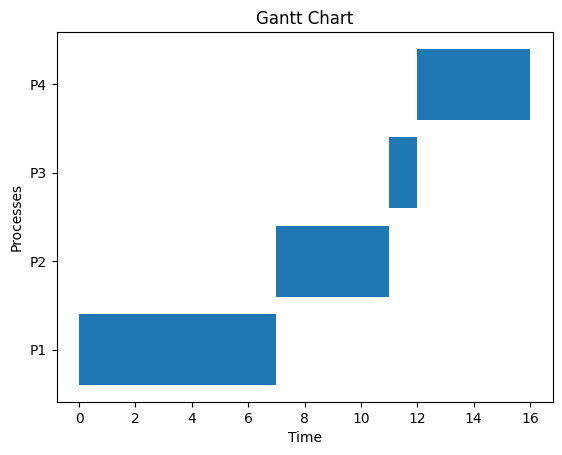

In [4]:
import queue
import matplotlib.pyplot as plt


class Process:
    def __init__(self, name, arrival_time, burst_time):
        self.name = name
        self.arrival_time = arrival_time
        self.burst_time = burst_time


def FCFS(processes):
    processes.sort(
        key=lambda x: x.arrival_time
    )  # Sắp xếp các tiến trình theo thời gian đến

    current_time = 0
    gantt_chart = []  # Biểu đồ Gantt

    for process in processes:
        current_time = max(
            current_time, process.arrival_time
        )  # Chờ nếu tiến trình chưa đến
        gantt_chart.append(
            (current_time, current_time + process.burst_time, process.name)
        )
        current_time += process.burst_time

    return gantt_chart


def draw_gantt_chart(gantt_chart):
    fig, gnt = plt.subplots()
    gnt.set_title("Gantt Chart")

    gnt.set_xlabel("Time")
    gnt.set_ylabel("Processes")

    gnt.set_yticks(range(len(gantt_chart)))
    gnt.set_yticklabels([g[2] for g in gantt_chart])

    for i, g in enumerate(gantt_chart):
        gnt.broken_barh([(g[0], g[1] - g[0])], (i - 0.4, 0.8), facecolors=("tab:blue"))

    plt.show()


if __name__ == "__main__":
    processes = [
        Process("P1", 0, 7),
        Process("P2", 2, 4),
        Process("P3", 4, 1),
        Process("P4", 5, 4),
    ]

    gantt_chart = FCFS(processes)
    print("Gantt Chart for FCFS:")
    for g in gantt_chart:
        print(g)

    draw_gantt_chart(gantt_chart)

Gantt Chart for SJF (Non-Preemptive):
(0, 7, 'P1')
(7, 8, 'P3')
(8, 12, 'P2')
(12, 16, 'P4')


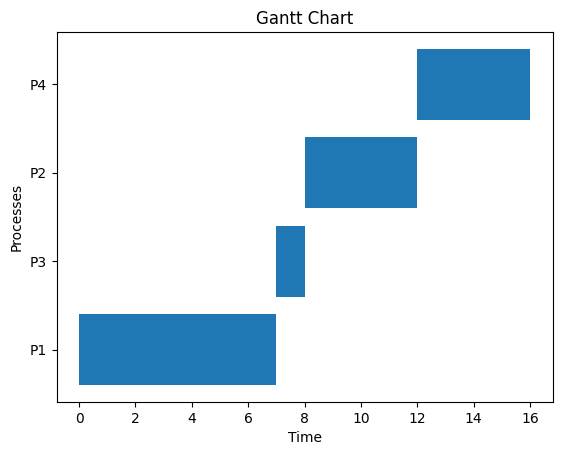

In [7]:
import queue
import matplotlib.pyplot as plt


class Process:
    def __init__(self, name, arrival_time, burst_time):
        self.name = name
        self.arrival_time = arrival_time
        self.burst_time = burst_time


def SJF_non_preemptive(processes):
    processes.sort(
        key=lambda x: x.arrival_time
    )  # Sắp xếp các tiến trình theo thời gian đến

    current_time = 0
    gantt_chart = []  # Biểu đồ Gantt
    ready_queue = queue.PriorityQueue()

    i = 0
    while i < len(processes) or not ready_queue.empty():
        while i < len(processes) and processes[i].arrival_time <= current_time:
            ready_queue.put((processes[i].burst_time, processes[i].name))
            i += 1

        if ready_queue.empty():
            current_time = processes[i].arrival_time
            continue

        burst_time, name = ready_queue.get()
        gantt_chart.append((current_time, current_time + burst_time, name))
        current_time += burst_time

    return gantt_chart


def draw_gantt_chart(gantt_chart):
    fig, gnt = plt.subplots()
    gnt.set_title("Gantt Chart")
    gnt.set_xlabel("Time")
    gnt.set_ylabel("Processes")
    gnt.set_yticks(range(len(gantt_chart)))
    gnt.set_yticklabels([g[2] for g in gantt_chart])

    for i, g in enumerate(gantt_chart):
        gnt.broken_barh([(g[0], g[1] - g[0])], (i - 0.4, 0.8), facecolors=("tab:blue"))

    plt.show()


if __name__ == "__main__":
    processes = [
        Process("P1", 0, 7),
        Process("P2", 2, 4),
        Process("P3", 4, 1),
        Process("P4", 5, 4),
    ]

    gantt_chart = SJF_non_preemptive(processes)
    print("Gantt Chart for SJF (Non-Preemptive):")
    for g in gantt_chart:
        print(g)

    draw_gantt_chart(gantt_chart)

Gantt Chart for SJF Preemptive:
(0, 1, 'P1')
(1, 2, 'P1')
(2, 3, 'P2')
(3, 4, 'P2')
(4, 5, 'P3')
(5, 6, 'P2')
(6, 7, 'P2')
(7, 8, 'P4')
(8, 9, 'P4')
(9, 10, 'P4')
(10, 11, 'P4')
(11, 12, 'P1')
(12, 13, 'P1')
(13, 14, 'P1')
(14, 15, 'P1')
(15, 16, 'P1')


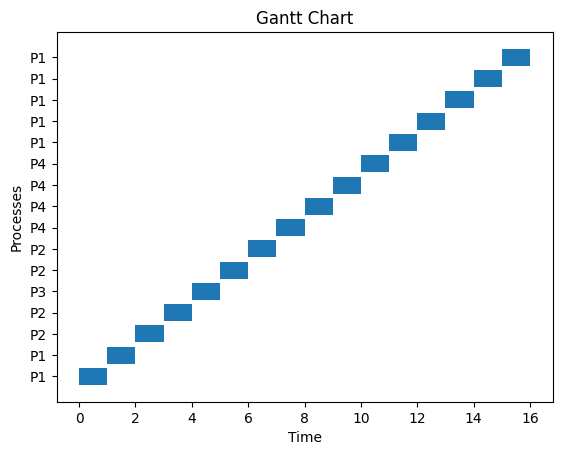

In [8]:
import matplotlib.pyplot as plt


class Process:
    def __init__(self, name, arrival_time, burst_time):
        self.name = name
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.remaining_time = burst_time


def sjf_preemptive(processes):
    gantt_chart = []
    remaining_processes = processes[:]
    current_time = 0

    while remaining_processes:
        ready_processes = [
            p for p in remaining_processes if p.arrival_time <= current_time
        ]
        if not ready_processes:
            current_time += 1
            continue

        shortest_process = min(ready_processes, key=lambda p: p.remaining_time)
        gantt_chart.append((current_time, current_time + 1, shortest_process.name))
        current_time += 1
        shortest_process.remaining_time -= 1
        if shortest_process.remaining_time == 0:
            remaining_processes.remove(shortest_process)

    return gantt_chart


def draw_gantt_chart(gantt_chart):
    fig, gnt = plt.subplots()
    gnt.set_title("Gantt Chart")
    gnt.set_xlabel("Time")
    gnt.set_ylabel("Processes")
    gnt.set_yticks(range(len(gantt_chart)))
    gnt.set_yticklabels([g[2] for g in gantt_chart])

    for i, g in enumerate(gantt_chart):
        gnt.broken_barh([(g[0], g[1] - g[0])], (i - 0.4, 0.8), facecolors=("tab:blue"))

    plt.show()


if __name__ == "__main__":
    processes = [
        Process("P1", 0, 7),
        Process("P2", 2, 4),
        Process("P3", 4, 1),
        Process("P4", 5, 4),
    ]

    gantt_chart = sjf_preemptive(processes)
    print("Gantt Chart for SJF Preemptive:")
    for g in gantt_chart:
        print(g)

    draw_gantt_chart(gantt_chart)

Gantt Chart for Round Robin:
(0, 5, 'P1')
(5, 9, 'P2')
(9, 14, 'P3')
(14, 19, 'P4')
(19, 24, 'P5')
(24, 29, 'P6')
(29, 31, 'P1')
(31, 36, 'P3')
(36, 41, 'P4')
(41, 46, 'P5')
(46, 50, 'P6')
(50, 55, 'P3')
(55, 56, 'P4')
(56, 61, 'P5')
(61, 66, 'P5')


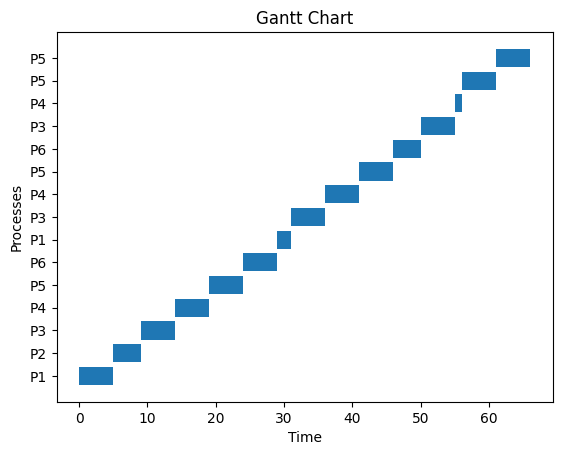

In [4]:
import matplotlib.pyplot as plt


class Process:
    def __init__(self, name, arrival_time, burst_time):
        self.name = name
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.remaining_time = burst_time


def round_robin(processes, time_quantum):
    gantt_chart = []
    remaining_processes = processes[:]
    current_time = 0

    while remaining_processes:
        for process in remaining_processes[:]:
            if process.remaining_time <= time_quantum:
                gantt_chart.append(
                    (current_time, current_time + process.remaining_time, process.name)
                )
                current_time += process.remaining_time
                process.remaining_time = 0
                remaining_processes.remove(process)
            else:
                gantt_chart.append(
                    (current_time, current_time + time_quantum, process.name)
                )
                current_time += time_quantum
                process.remaining_time -= time_quantum

        for process in remaining_processes[:]:
            if process.arrival_time > current_time:
                current_time = process.arrival_time
            if process.remaining_time > 0:
                break

    return gantt_chart


def draw_gantt_chart(gantt_chart):
    fig, gnt = plt.subplots()
    gnt.set_title("Gantt Chart")
    gnt.set_xlabel("Time")
    gnt.set_ylabel("Processes")
    gnt.set_yticks(range(len(gantt_chart)))
    gnt.set_yticklabels([g[2] for g in gantt_chart])

    for i, g in enumerate(gantt_chart):
        gnt.broken_barh([(g[0], g[1] - g[0])], (i - 0.4, 0.8), facecolors=("tab:blue"))

    plt.show()


if __name__ == "__main__":
    processes = [
        Process("P1", 0, 7),
        Process("P2", 1, 4),
        Process("P3", 2, 15),
        Process("P4", 3, 11),
        Process("P5", 4, 20),
        Process("P6", 4, 9),
    ]
    time_quantum = 5

    gantt_chart = round_robin(processes, time_quantum)
    print("Gantt Chart for Round Robin:")
    for g in gantt_chart:
        print(g)

    draw_gantt_chart(gantt_chart)

Gantt Chart for SRJF with Priority:
(0, 1, 'P2')
(1, 5, 'P3')
(5, 7, 'P0')
(7, 11, 'P1')
(11, 16, 'P2')


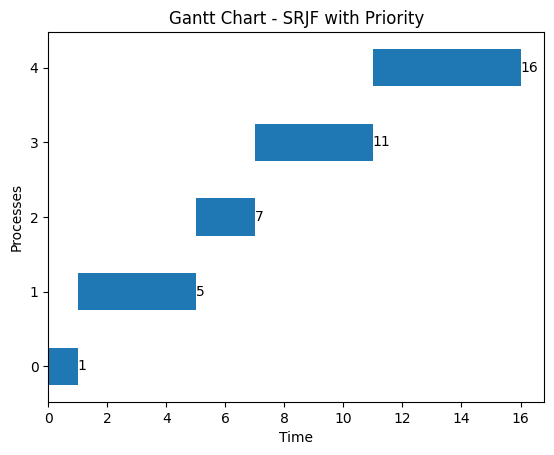

In [16]:
class Process:
    def __init__(self, name, arrival_time, burst_time):
        self.name = name
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.remaining_time = burst_time


def srjf_preemptive(processes):
    current_time = 0
    gantt_chart = []
    ready_queue = []

    while processes or ready_queue:
        # Thêm các tiến trình mới đến hàng đợi khi đến thời gian của chúng
        for process in processes:
            if process.arrival_time == current_time:
                ready_queue.append(process)
                processes.remove(process)

        # Sắp xếp hàng đợi theo thời gian đến và thời gian CPU còn lại
        ready_queue.sort(key=lambda x: (x.arrival_time, x.remaining_time))

        if ready_queue:
            shortest_process = min(
                ready_queue, key=lambda x: (x.remaining_time, x.arrival_time)
            )
            gantt_chart.append((current_time, current_time + 1, shortest_process.name))
            shortest_process.remaining_time -= 1

            if shortest_process.remaining_time == 0:
                ready_queue.remove(shortest_process)

        current_time += 1

    return gantt_chart


def draw_gantt_chart(gantt_chart):
    import matplotlib.pyplot as plt

    fig, gnt = plt.subplots()
    gnt.set_title("Gantt Chart - SRJF with Priority")
    gnt.set_xlabel("Time")
    gnt.set_ylabel("Processes")

    for i, g in enumerate(gantt_chart):
        gnt.barh(
            i, g[1] - g[0], left=g[0], height=0.5, color="tab:blue", align="center"
        )  # Sử dụng barh để vẽ biểu đồ Gantt
        gnt.text(
            g[1], i, str(g[1]), ha="left", va="center"
        )  # Thêm giá trị bên phải cho mỗi ô

    plt.show()


def simplify_intervals(intervals):
    simplified_intervals = []
    start_time = intervals[0][0]
    end_time = intervals[0][1]
    process_name = intervals[0][2]

    for i in range(1, len(intervals)):
        if intervals[i][2] == process_name:
            end_time = intervals[i][1]
        else:
            simplified_intervals.append((start_time, end_time, process_name))
            start_time = intervals[i][0]
            end_time = intervals[i][1]
            process_name = intervals[i][2]

    simplified_intervals.append((start_time, end_time, process_name))

    return simplified_intervals


if __name__ == "__main__":
    processes = [
        Process("P0", 3, 2),
        Process("P1", 2, 4),
        Process("P2", 0, 6),
        Process("P3", 1, 4),
    ]

    gantt_chart = simplify_intervals(srjf_preemptive(processes))
    print("Gantt Chart for SRJF with Priority:")
    for g in gantt_chart:
        print(g)

    draw_gantt_chart(gantt_chart)

Gantt Chart for SRJF with Priority:
(0, 1, 'P2')
(1, 5, 'P3')
(5, 7, 'P0')
(7, 11, 'P1')
(11, 16, 'P2')


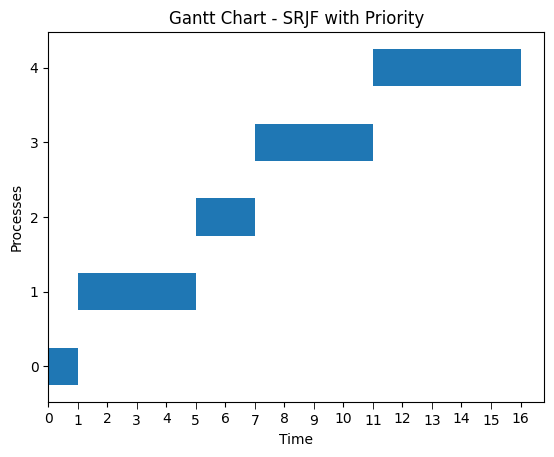

In [19]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator


class Process:
    def __init__(self, name, arrival_time, burst_time):
        self.name = name
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.remaining_time = burst_time


def srjf_preemptive(processes):
    current_time = 0
    gantt_chart = []
    ready_queue = []

    while processes or ready_queue:
        # Thêm các tiến trình mới đến hàng đợi khi đến thời gian của chúng
        for process in processes:
            if process.arrival_time == current_time:
                ready_queue.append(process)
                processes.remove(process)

        # Sắp xếp hàng đợi theo thời gian đến và thời gian CPU còn lại
        ready_queue.sort(key=lambda x: (x.arrival_time, x.remaining_time))

        if ready_queue:
            shortest_process = min(
                ready_queue, key=lambda x: (x.remaining_time, x.arrival_time)
            )
            gantt_chart.append((current_time, current_time + 1, shortest_process.name))
            shortest_process.remaining_time -= 1

            if shortest_process.remaining_time == 0:
                ready_queue.remove(shortest_process)

        current_time += 1

    return gantt_chart


def draw_gantt_chart(gantt_chart):
    fig, gnt = plt.subplots()
    gnt.set_title("Gantt Chart - SRJF with Priority")
    gnt.set_xlabel("Time")
    gnt.set_ylabel("Processes")

    for i, g in enumerate(gantt_chart):
        gnt.barh(
            i, g[1] - g[0], left=g[0], height=0.5, color="tab:blue", align="center"
        )  # Sử dụng barh để vẽ biểu đồ Gantt
    gnt.xaxis.set_minor_locator(MultipleLocator(1))  # Thêm minor ticks
    gnt.xaxis.set_minor_formatter(
        plt.FuncFormatter(lambda x, _: int(x))
    )  # Định dạng minor tick labels
    gnt.tick_params(which="minor", length=5)  # Độ dài của minor ticks

    plt.show()


def simplify_intervals(intervals):
    simplified_intervals = []
    start_time = intervals[0][0]
    end_time = intervals[0][1]
    process_name = intervals[0][2]

    for i in range(1, len(intervals)):
        if intervals[i][2] == process_name:
            end_time = intervals[i][1]
        else:
            simplified_intervals.append((start_time, end_time, process_name))
            start_time = intervals[i][0]
            end_time = intervals[i][1]
            process_name = intervals[i][2]

    simplified_intervals.append((start_time, end_time, process_name))

    return simplified_intervals


if __name__ == "__main__":
    processes = [
        Process("P0", 3, 2),
        Process("P1", 2, 4),
        Process("P2", 0, 6),
        Process("P3", 1, 4),
    ]

    gantt_chart = simplify_intervals(srjf_preemptive(processes))
    print("Gantt Chart for SRJF with Priority:")
    for g in gantt_chart:
        print(g)

    draw_gantt_chart(gantt_chart)

Gantt Chart for SRJF with Priority:
(0, 1, 'P2')
(1, 2, 'P3')
(2, 3, 'P3')
(3, 4, 'P3')
(4, 5, 'P3')
(5, 6, 'P0')
(6, 7, 'P0')
(7, 8, 'P1')
(8, 9, 'P1')
(9, 10, 'P1')
(10, 11, 'P1')
(11, 12, 'P2')
(12, 13, 'P2')
(13, 14, 'P2')
(14, 15, 'P2')
(15, 16, 'P2')

Waiting time for each process:

Average Waiting Time: 0.00


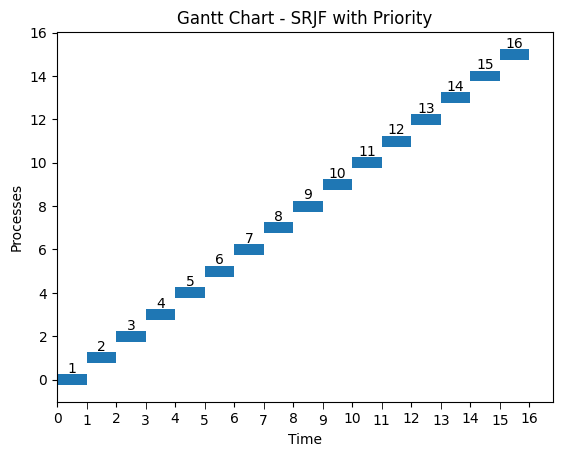

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator


class Process:
    def __init__(self, name, arrival_time, burst_time):
        self.name = name
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.remaining_time = burst_time
        self.waiting_time = (
            0  # Thêm thuộc tính waiting_time để lưu thời gian chờ của tiến trình
        )


def srjf_preemptive(processes):
    current_time = 0
    gantt_chart = []
    ready_queue = []

    while processes or ready_queue:
        # Thêm các tiến trình mới đến hàng đợi khi đến thời gian của chúng
        for process in processes:
            if process.arrival_time == current_time:
                ready_queue.append(process)
                processes.remove(process)

        # Sắp xếp hàng đợi theo thời gian đến và thời gian CPU còn lại
        ready_queue.sort(key=lambda x: (x.arrival_time, x.remaining_time))

        if ready_queue:
            shortest_process = min(
                ready_queue, key=lambda x: (x.remaining_time, x.arrival_time)
            )
            gantt_chart.append((current_time, current_time + 1, shortest_process.name))
            shortest_process.remaining_time -= 1

            if shortest_process.remaining_time == 0:
                ready_queue.remove(shortest_process)
            else:
                for process in ready_queue:
                    if process != shortest_process:
                        process.waiting_time += 1  # Tăng thời gian chờ của các tiến trình còn lại trong hàng đợi

        current_time += 1

    return gantt_chart


def draw_gantt_chart(gantt_chart):
    fig, gnt = plt.subplots()
    gnt.set_title("Gantt Chart - SRJF with Priority")
    gnt.set_xlabel("Time")
    gnt.set_ylabel("Processes")

    for i, g in enumerate(gantt_chart):
        gnt.barh(
            i, g[1] - g[0], left=g[0], height=0.5, color="tab:blue", align="center"
        )
        gnt.text(g[0] + (g[1] - g[0]) / 2, i + 0.5, str(g[1]), ha="center", va="center")

    gnt.xaxis.set_minor_locator(MultipleLocator(1))
    gnt.xaxis.set_minor_formatter(plt.FuncFormatter(lambda x, _: int(x)))
    gnt.tick_params(which="minor", length=5)

    plt.show()


def calculate_waiting_time(processes):
    total_waiting_time = 0
    total_processes = len(processes)
    if total_processes == 0:  # Kiểm tra nếu danh sách processes rỗng
        return 0
    for process in processes:
        total_waiting_time += process.waiting_time
    return total_waiting_time / total_processes


if __name__ == "__main__":
    processes = [
        Process("P0", 3, 2),
        Process("P1", 2, 4),
        Process("P2", 0, 6),
        Process("P3", 1, 4),
    ]

    gantt_chart = srjf_preemptive(processes)
    print("Gantt Chart for SRJF with Priority:")
    for g in gantt_chart:
        print(g)

    print("\nWaiting time for each process:")
    for process in processes:
        print(f"{process.name}: {process.waiting_time}")

    avg_waiting_time = calculate_waiting_time(processes)
    print(f"\nAverage Waiting Time: {avg_waiting_time:.2f}")

    draw_gantt_chart(gantt_chart)

Gantt Chart for Round Robin:
(0, 5, 'P1')
(5, 9, 'P2')
(9, 14, 'P3')
(14, 19, 'P4')
(19, 24, 'P5')
(24, 29, 'P6')
(29, 31, 'P1')
(31, 36, 'P3')
(36, 41, 'P4')
(41, 46, 'P5')
(46, 50, 'P6')
(50, 55, 'P3')
(55, 56, 'P4')
(56, 61, 'P5')
(61, 66, 'P5')


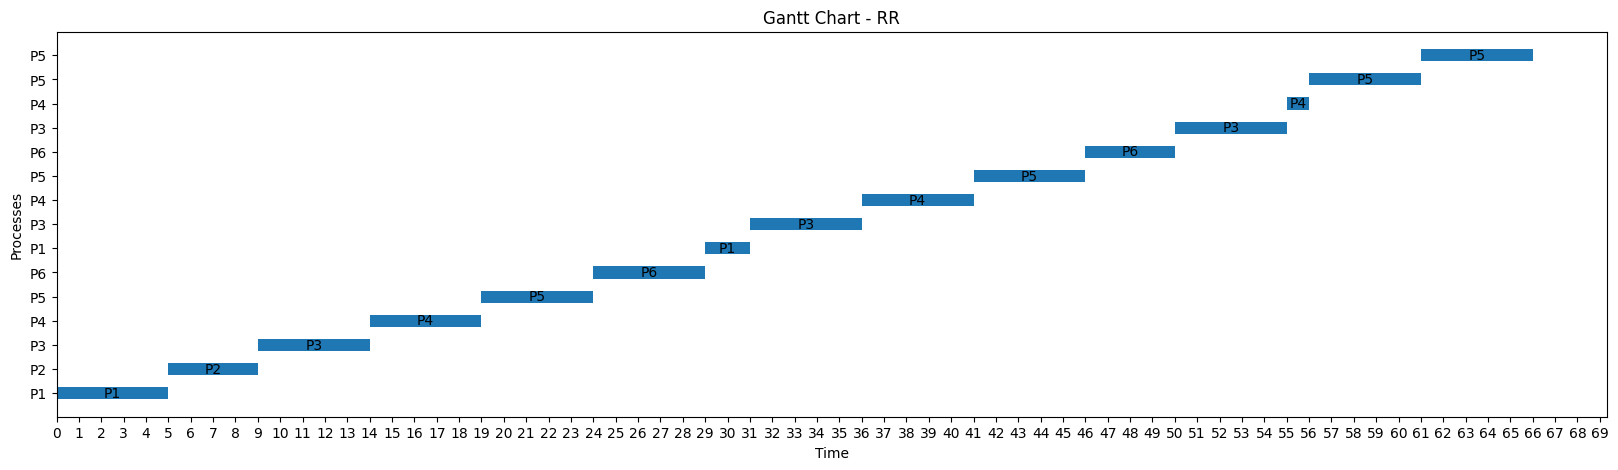

Waiting times for each process: {'P1': 0, 'P2': 4, 'P3': 7, 'P4': 11, 'P5': 15, 'P6': 20}
Average waiting time: 9.5


In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


class Process:
    def __init__(self, name, arrival_time, burst_time):
        self.name = name
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.remaining_time = burst_time
        self.waiting_time = 0


def round_robin(processes, time_quantum):
    gantt_chart = []
    remaining_processes = processes[:]
    current_time = 0

    while remaining_processes:
        for process in remaining_processes[:]:
            if process.remaining_time <= time_quantum:
                gantt_chart.append(
                    (current_time, current_time + process.remaining_time, process.name)
                )
                current_time += process.remaining_time
                process.remaining_time = 0
                remaining_processes.remove(process)
            else:
                gantt_chart.append(
                    (current_time, current_time + time_quantum, process.name)
                )
                current_time += time_quantum
                process.remaining_time -= time_quantum

        for process in remaining_processes[:]:
            if process.arrival_time > current_time:
                current_time = process.arrival_time
            if process.remaining_time > 0:
                break

    return gantt_chart


def draw_gantt_chart(gantt_chart):
    fig, gnt = plt.subplots(figsize=(20, 5))
    gnt.set_title("Gantt Chart - RR")
    gnt.set_xlabel("Time")
    gnt.set_ylabel("Processes")

    for i, g in enumerate(gantt_chart):
        gnt.barh(
            i, g[1] - g[0], left=g[0], height=0.5, color="tab:blue", align="center"
        )
        gnt.text((g[0] + g[1]) * 0.5, i, g[2], ha="center", va="center")

    plt.yticks(range(len(gantt_chart)), [g[2] for g in gantt_chart])

    gnt.xaxis.set_major_locator(MultipleLocator(1))
    gnt.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
    gnt.tick_params(which="minor", length=5)

    plt.show()


def calculate_waiting_time(processes, gantt_chart):
    waiting_time = {}
    for process in processes:
        process_start = None
        process_end = None
        for g in gantt_chart:
            if g[2] == process.name:
                process_start = g[0]
                process_end = g[1]
                break
        if process_start is not None and process_end is not None:
            process.waiting_time = process_start - process.arrival_time
            waiting_time[process.name] = process.waiting_time

    return waiting_time


if __name__ == "__main__":
    processes = [
        Process("P1", 0, 7),
        Process("P2", 1, 4),
        Process("P3", 2, 15),
        Process("P4", 3, 11),
        Process("P5", 4, 20),
        Process("P6", 4, 9),
    ]
    time_quantum = 5

    gantt_chart = round_robin(processes, time_quantum)
    print("Gantt Chart for Round Robin:")
    for g in gantt_chart:
        print(g)

    draw_gantt_chart(gantt_chart)

    waiting_times = calculate_waiting_time(processes, gantt_chart)
    avg_waiting_time = sum(waiting_times.values()) / len(processes)
    print("Waiting times for each process:", waiting_times)
    print("Average waiting time:", avg_waiting_time)